In [2]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML
import numpy as np

In [3]:
##initialising some constants
BATCH_SIZE = 32  
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=20

In [4]:
## load images from a directory structure and prepare them as a dataset for machine learning models.
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    seed=123, ## ensures that 80% of the dataset that goes into train is shuffled amongst itself and not mixed wid the other20% that is in val and test
    shuffle=True, #randomly shuffling
    image_size=(IMAGE_SIZE,IMAGE_SIZE), # keeping image size as 256*256
    batch_size=BATCH_SIZE  #divinding batches into a group of 32
)

Found 2152 files belonging to 3 classes.


In [5]:
##not related to the code
class_names=dataset.class_names ##retrieves the names of the classes
class_names
#This loops through the first batch of images and labels in the dataset.
for image_batch,label_batch in dataset.take(1):
    print("image+++",image_batch.shape)
    print("label+++",label_batch.numpy())

image+++ (32, 256, 256, 3)
label+++ [1 1 1 0 0 0 0 0 1 1 1 1 0 1 0 1 1 1 0 1 0 1 0 0 1 0 0 1 1 2 0 0]


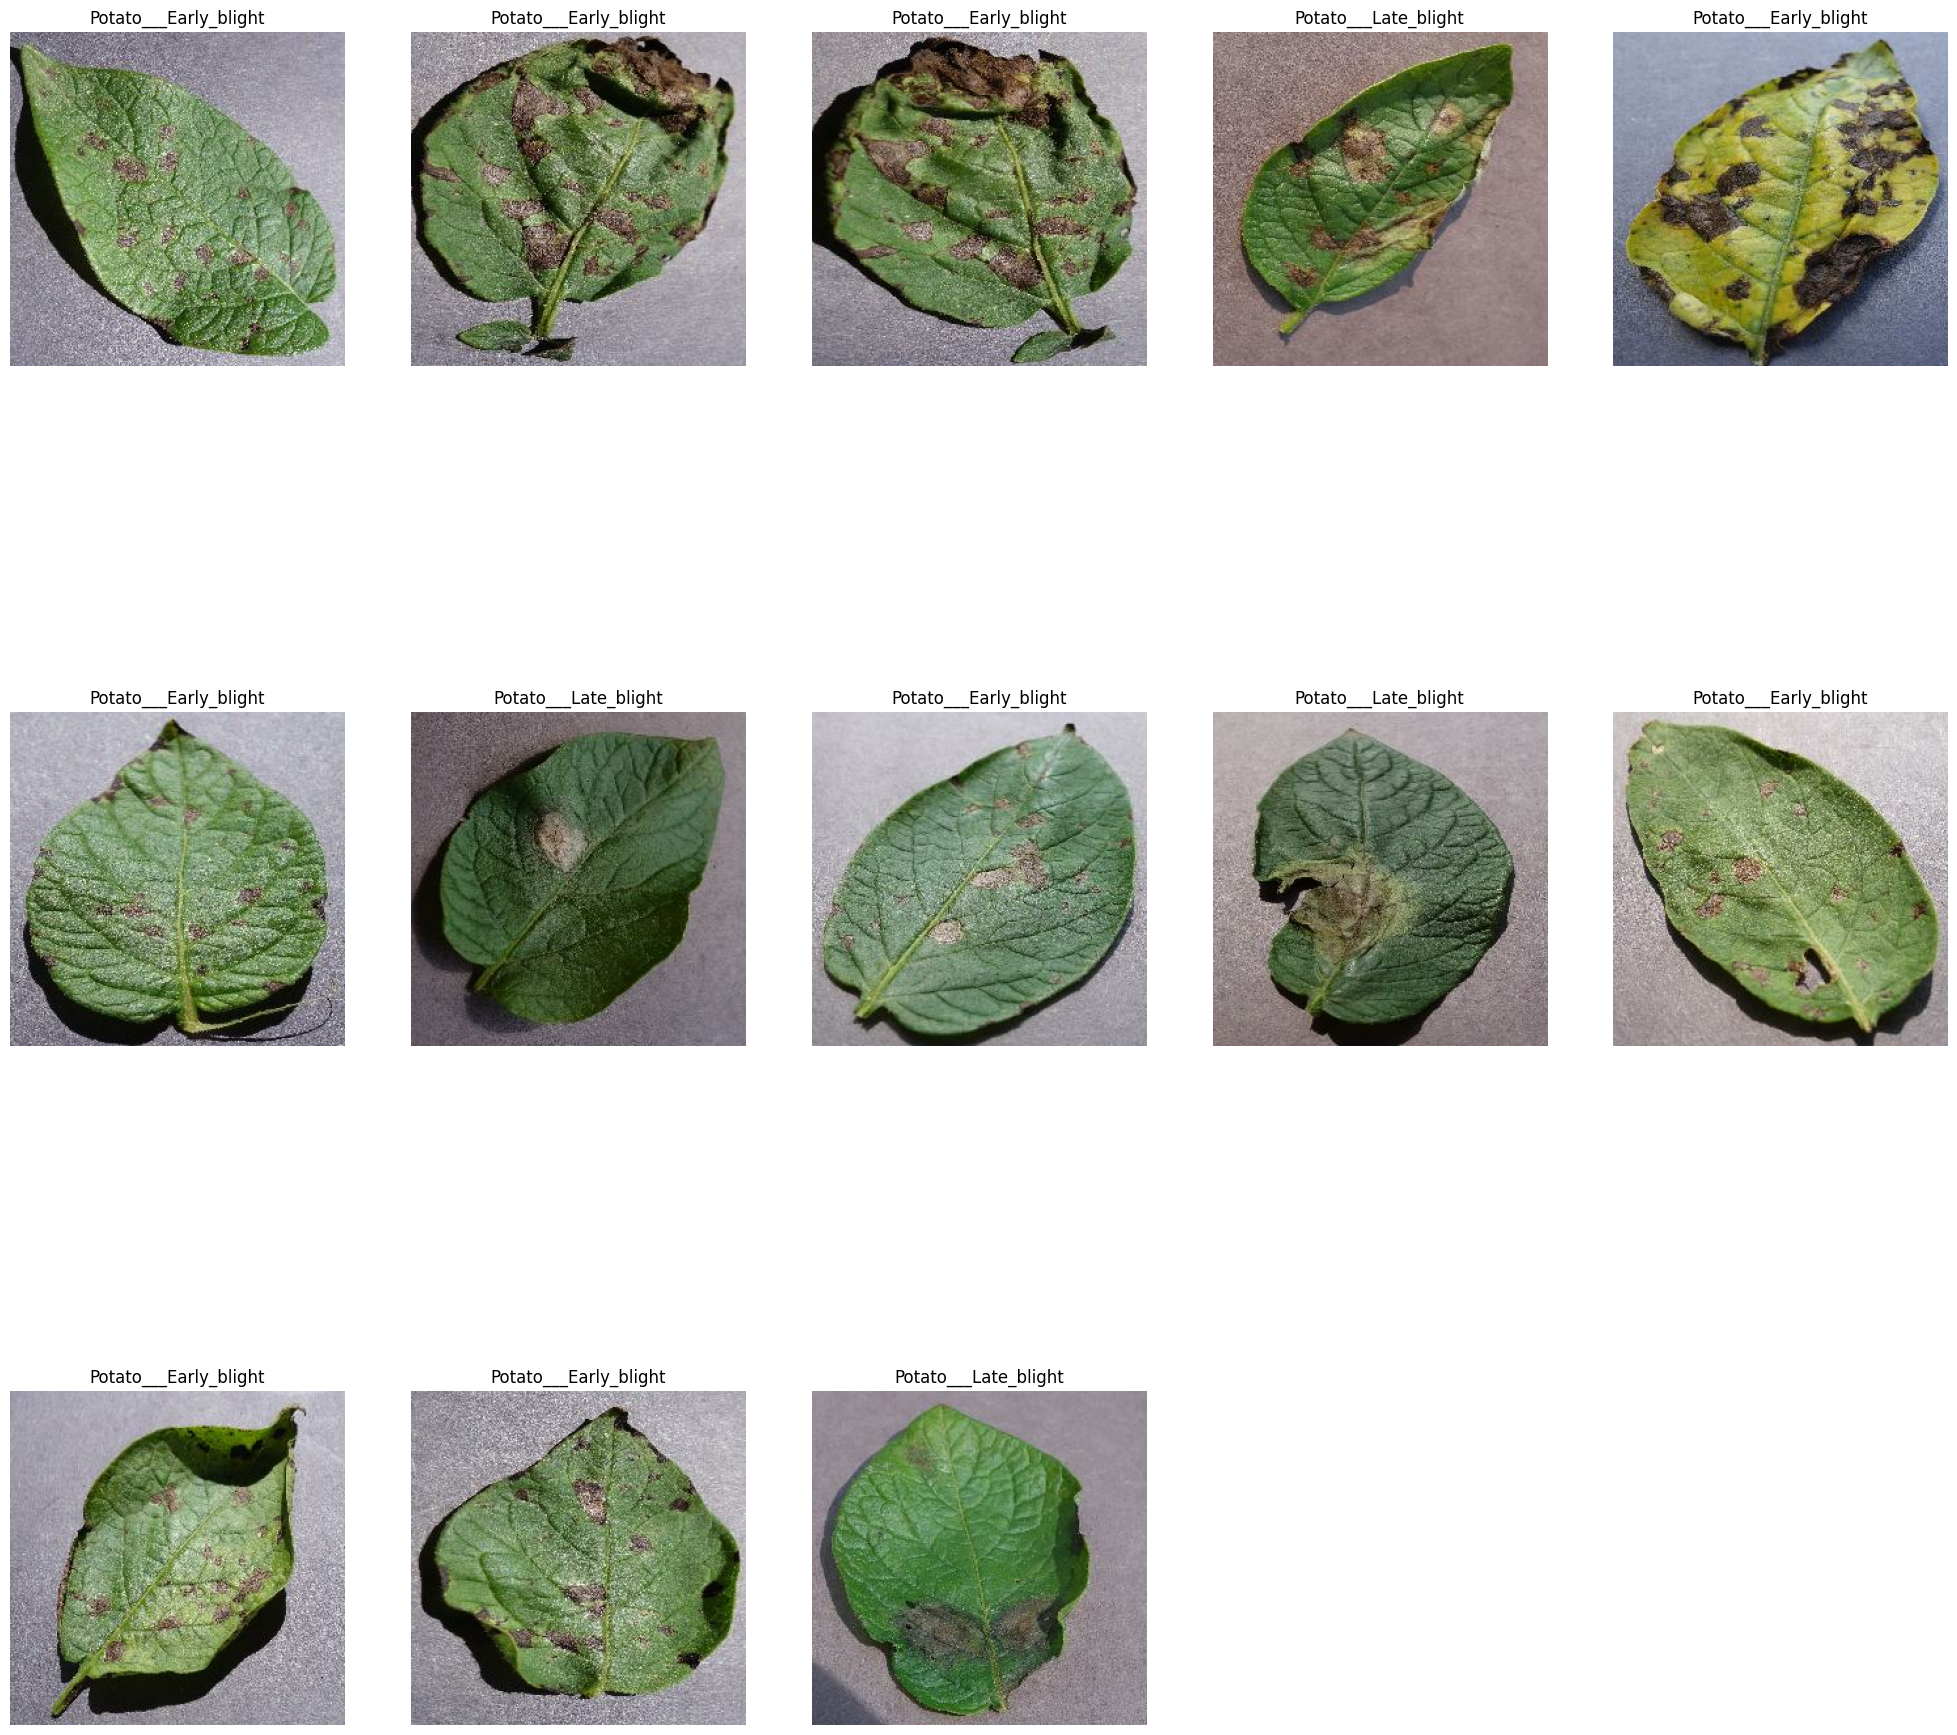

In [6]:
plt.figure(figsize=(25,25)) #Creates a new figure with a specified size of 25x25 inches.
#Loops through the first batch of images (image_batch) and their labels (label_batch) from the dataset.
for image_batch,label_batch in dataset.take(1):
    for i in range (13):#each batch has 32 images so going through 1st 13
        ax=plt.subplot(3,5,i+1) #Creates a subplot in a grid of 3 rows x 5 columns to display up to 15 images
        plt.imshow(image_batch[i].numpy().astype("uint8"))# displays image and Converts the i-th image tensor to a NumPy array, then to uint8 format for display.
        plt.title(class_names[label_batch[i]]) #Retrieves the class name for the i-th image label 
        plt.axis("off")#Removes the axes around each image for a cleaner look.

In [7]:
#80% train   20%-> 10% val 10% test
def get_dataset_partitions_tf (ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=1000):
    total_len=len(dataset)
    train_size=int(total_len*0.8)
    val_size=int(total_len*0.1)
    test_size=total_len-(train_size+val_size)

    train_ds=dataset.take(train_size)#train 80%
    remaining=dataset.skip(train_size)#20% left by train
    val_ds=remaining.take(val_size) ##20% remianing dataset se take 10%
    test_ds=remaining.skip(val_size) ####20% remianing dataset se have the leftover 10%
    return train_ds,test_ds,val_ds

In [8]:
train_ds,test_ds,val_ds=get_dataset_partitions_tf(dataset) #call the function
print(len(val_ds))
print(len(train_ds))

6
54


In [9]:
#Resizing: Makes all images the same size.
#Rescaling: Normalizes pixel values to [0, 1]
#tf.keras.sequential -> stacks layers one after another. (sandwich)

In [10]:
resize_and_rescale=tf.keras.Sequential([
   layers.Resizing(IMAGE_SIZE,IMAGE_SIZE),
        tf.keras.layers.Rescaling(1./255)
])

In [11]:
# data agumentation->increase the size of a dataset by applying random transformations
data_augmentation = tf.keras.Sequential([
 tf.keras.layers.RandomFlip("horizontal_and_vertical"),
  tf.keras.layers.RandomRotation(0.2),
])

In [12]:
#building a model
#convolution- applies filters to input images to extract features like edges, textures, etc.
#pooling-Reduces the spatial dimensions (height and width) of the image while retaining the most important features.
n_classes=3
input_shape=(BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
model=models.Sequential([
    resize_and_rescale,
    data_augmentation,
    #layers.Input(shape=input_shape),
    layers.Conv2D(32,kernel_size = (3,3),activation="relu",input_shape=input_shape),#1
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),#2
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),#3
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),#4
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),#5
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),#6
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),#Flatten converts the 2D data (image features) into a 1D vector.
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax')
])
#model.build(input_shape=input_shape) write this line if u dont wanna specify input in convo2d line
model.summary()

C:\Users\HP-PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_1 (Sequential)            │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=["accuracy"])

In [22]:
history=model.fit(
    train_ds,
      batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    verbose=1,
    validation_data=val_ds)

Epoch 1/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 50s 864ms/step - accuracy: 0.9915 - loss: 0.0234 - val_accuracy: 0.9844 - val_loss: 0.0369
Epoch 2/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 45s 827ms/step - accuracy: 0.9832 - loss: 0.0503 - val_accuracy: 0.9323 - val_loss: 0.1681
Epoch 3/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 51s 936ms/step - accuracy: 0.9846 - loss: 0.0346 - val_accuracy: 0.9896 - val_loss: 0.0394
Epoch 4/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 49s 904ms/step - accuracy: 0.9872 - loss: 0.0265 - val_accuracy: 0.9844 - val_loss: 0.0588
Epoch 5/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 52s 965ms/step - accuracy: 0.9881 - loss: 0.0298 - val_accuracy: 0.9792 - val_loss: 0.0855
Epoch 6/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 52s 955ms/step - accuracy: 0.9940 - loss: 0.0180 - val_accuracy: 0.9948 - val_loss: 0.0429
Epoch 7/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 47s 877ms/step - accuracy: 0.9915 - loss: 0.0237 - val_accuracy: 0.9896 - val_loss: 0.0408
Epoch 8/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 46s 858ms/step - accuracy: 0.9933 - loss: 0.0183 - val_accu

In [23]:
scores=model.evaluate(test_ds)

8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 517ms/step - accuracy: 0.9990 - loss: 0.0167


In [24]:
scores

[0.0213724747300148, 0.9956896305084229]

In [25]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 54}

In [26]:
acc=history.history['accuracy']
loss=history.history['loss']
val_acc=history.history[ 'val_accuracy']
val_loss=history.history['val_loss']

In [27]:
range(EPOCHS)

range(0, 20)

Text(0.5, 1.0, 'Training and Validation Loss')

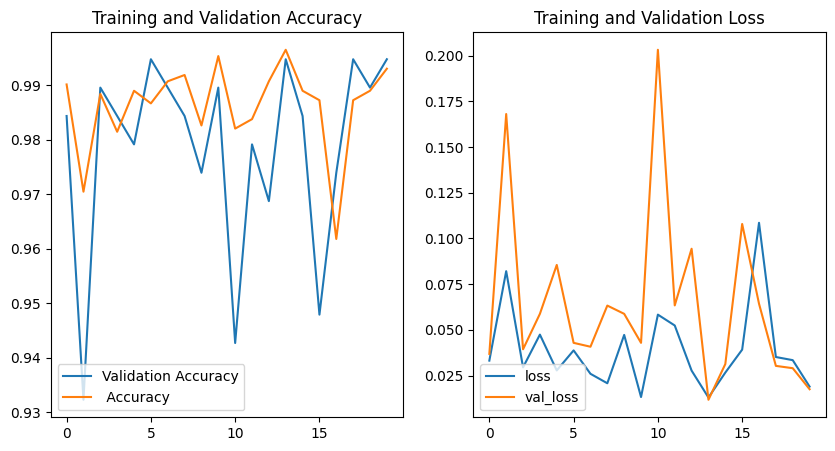

In [28]:
##ploting graphs for accuracy and loss of training and val dataset
#accuracy should go higer and loss should go lower
plt.figure(figsize=(10,5)),
plt.subplot(1,2,1)#create a subplot layout in a figure with 1 row and 2 columns, and selects the 1st subplot (on the left).
plt.plot(range(EPOCHS),val_acc,label='Validation Accuracy')
plt.plot(range(EPOCHS),acc,label=' Accuracy')
plt.legend(loc='lower left')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
#plt.figure(figsize=(10,5)),
plt.plot(range(EPOCHS),loss,label='loss'),
plt.plot(range(EPOCHS),val_loss,label='val_loss'),
plt.legend(loc='lower left') 
plt.title('Training and Validation Loss')


first image to predict:
AxesImage(shape=(256, 256, 3))
actual label:
Potato___Late_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
predicted label: Potato___Late_blight


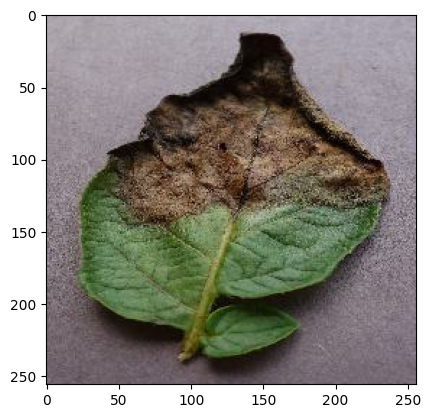

In [32]:
#prediction for 1st batch 1st image
for image_batch,label_batch in test_ds.take(1):
    img=image_batch[0].numpy().astype('uint8')
    label=label_batch[0].numpy()
    print('first image to predict:')
    print(plt.imshow(img))
    print('actual label:')
    print(class_names[label])
#we took 3 classes late blight,early bight and healthy leaf so our model will give predictions for all of them 
#whosoever has the highest value has the max chance of being close to the actual value/label/image
# so when we do (batch_prediction[0]) its gives ans as --> [9.7399884e-01, 2.5470406e-02, 5.3077418e-04]
#by applying np.argmax(batch_prediction[0])    it gives index of highest value i.e 0 in this case
 #after that extral the class name on from that index 
    batch_prediction=model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])]) 

In [33]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 514ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


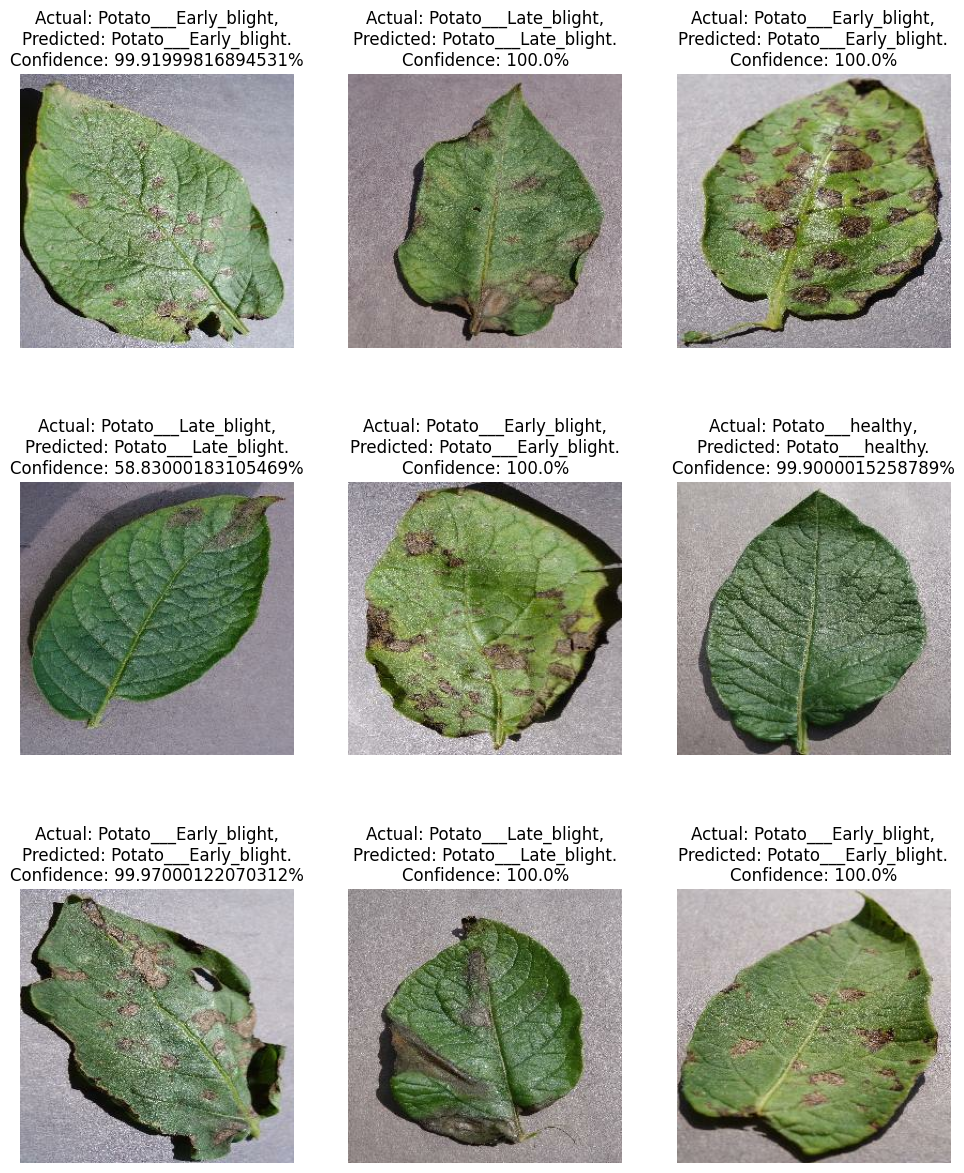

In [34]:

plt.figure(figsize=(12, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        
        # Convert tensor to numpy and then to uint8 for visualization
        plt.imshow(images[i].numpy().astype("uint8"))
        
        # Predict the class and confidence
        predicted_class, confidence = predict(model, images[i].numpy())  # Pass Numpy array
        actual_class = class_names[labels[i]]
        
        # Set the title
        plt.title(f"Actual: {actual_class},\nPredicted: {predicted_class}.\nConfidence: {confidence}%")
        plt.axis("off")


        

In [38]:
import os
model_version = 1
model_path = os.path.join("C:\\code\\potato disease\\models", f"model_v{model_version}.keras")  # Use .keras instead of .h5
model.save(model_path)


